In [1]:
import numpy as np
from sklearn.neighbors import RadiusNeighborsRegressor
from n_dimensional_datasets import *
from plotter import *

In [2]:
start = -1
stop = 1
n_samples = 1000

mean error: 0.031623050974206465, mean score: 0.030011534763533


errors: [0.02921411852644055, 0.036005704799015256, 0.03335216769313732, 0.03341748269046326, 0.02698900616921823, 0.03722030988415378, 0.02939192757567954, 0.02722274093775792, 0.030549211026933115, 0.03286784043926569]

score: [-0.008127601338505652, -0.04677827335272422, -0.04644831692309803, -0.04452045433698992, -0.01589755892687328, -0.0450050692581343, -0.02606262619768218, -0.02202702504223475, -0.022864696578500654, -0.022383725680586997]


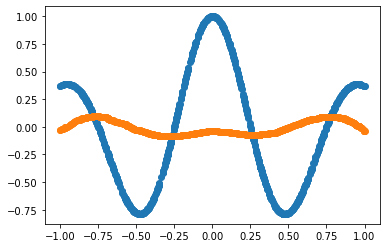

In [6]:
n_features = 1

stats = {"score": [], "error": []}
score = []
best = None

seeds = range(10)
for seed in seeds:
    X = stochastic_mesh(n_features, start, stop, n_samples).T
    y = decaying_sinewave_nd(X.T)
    neigh = RadiusNeighborsRegressor(n_neighbors=2)
    neigh.fit(X,y)
    score = neigh.score(X, y)
    stats["error"].append(np.mean(neigh.predict(X)-y))
    stats["score"].append(score)
    if best is None or np.any(score > stats["score"]):
        best = neigh
print("mean error: {}, mean score: {}\n\n".format(np.mean(np.abs(stats["error"])), np.mean(np.abs(stats["score"]))))
print("errors: {}\n\nscore: {}".format(stats["error"], stats["score"]))

import matplotlib.pyplot as plt
if X.shape[1] == 1:
    plt.plot(X, y, 'o')
    plt.plot(X, best.predict(X), 'o')

In [7]:
n_features = 2

stats = {"score": [], "error": []}
score = []
best = None

seeds = range(10)
for seed in seeds:
    X = stochastic_mesh(n_features, start, stop, n_samples, seed=seed).T
    y = decaying_sinewave_nd(X.T)
    neigh = RadiusNeighborsRegressor(n_neighbors=2)
    neigh.fit(X,y)
    score = neigh.score(X, y)
    stats["error"].append(np.mean(neigh.predict(X)-y))
    stats["score"].append(score)
    if best is None or np.any(score > stats["score"]):
        best = neigh
print("mean error: {}, mean score: {}\n\n".format(np.mean(np.abs(stats["error"])), np.mean(np.abs(stats["score"]))))
print("errors: {}\n\nscore: {}".format(stats["error"], stats["score"]))

if X.shape[1] == 2:
    plot3d_approximation(X.T, y.T.reshape(-1), best.predict(X).reshape(-1))

mean error: 0.0021438100136080074, mean score: 0.07031675331108686


errors: [-0.004502140107523869, -9.212176300865505e-05, -0.0006678874975828555, -0.005013541099457896, -0.0009483600854600338, -0.004267289130187432, 0.0005877265184780578, 0.0004493046460872447, -0.004908771227308092, -9.580609859356493e-07]

score: [0.07172097397593447, 0.07333884957163395, 0.07212276336547141, 0.07438784735321124, 0.06727740587081132, 0.06800233147677637, 0.0652199051915251, 0.07410659866705793, 0.06245459453667901, 0.07453626310176775]
